EXPLORATORY DATA ANALYSIS
* Visualize
* Find missing values
* Look for correlations

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv('train.csv')

In [5]:
train.info() # To print the full summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [6]:
train.info(verbose=False) #To print the short summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Columns: 13 entries, Loan_ID to Loan_Status
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [7]:
train.info(verbose=True,null_counts=False) #To print by excluding null_counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              object
Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
ApplicantIncome      int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        object
Loan_Status          object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [8]:
#Descriptive Statistics
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
train['Education'].value_counts() #Categorical Data

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [11]:
df_grp = train.groupby(['Married','Education'],as_index = False).mean() #Grouping
print(df_grp)

  Married     Education  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0      No      Graduate      5174.476190        1466.339286  135.110429   
1      No  Not Graduate      4208.444444         757.377778  105.279070   
2     Yes      Graduate      6225.355987        1868.248932  164.323333   
3     Yes  Not Graduate      3559.280899        1539.044944  125.130952   

   Loan_Amount_Term  Credit_History  
0        354.795181        0.834395  
1        336.571429        0.857143  
2        338.970297        0.869258  
3        330.000000        0.746835  


In [14]:
#simple Imputer
dummies = pd.get_dummies(train,drop_first=True)

In [15]:
from sklearn.impute import SimpleImputer
simple_imputer = SimpleImputer()

In [18]:
train = pd.DataFrame(simple_imputer.fit_transform(dummies),columns = dummies.columns)

In [19]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,...,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849.0,0.0,146.412162,360.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,4583.0,1508.0,128.000000,360.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3000.0,0.0,66.000000,360.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3,2583.0,2358.0,120.000000,360.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,6000.0,0.0,141.000000,360.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [22]:
train.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 628 columns):
ApplicantIncome            614 non-null float64
CoapplicantIncome          614 non-null float64
LoanAmount                 614 non-null float64
Loan_Amount_Term           614 non-null float64
Credit_History             614 non-null float64
Loan_ID_LP001003           614 non-null float64
Loan_ID_LP001005           614 non-null float64
Loan_ID_LP001006           614 non-null float64
Loan_ID_LP001008           614 non-null float64
Loan_ID_LP001011           614 non-null float64
Loan_ID_LP001013           614 non-null float64
Loan_ID_LP001014           614 non-null float64
Loan_ID_LP001018           614 non-null float64
Loan_ID_LP001020           614 non-null float64
Loan_ID_LP001024           614 non-null float64
Loan_ID_LP001027           614 non-null float64
Loan_ID_LP001028           614 non-null float64
Loan_ID_LP001029           614 non-null float64
Loan_ID_LP001030           614

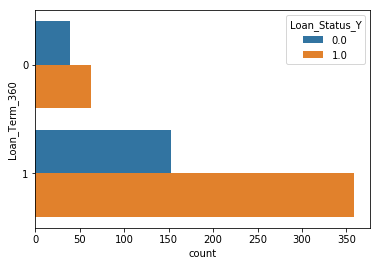

In [28]:
#Count plot
import seaborn as sns
train['Loan_Term_360'] = np.where(train.Loan_Amount_Term == 360,1,0)
sns.countplot(y = 'Loan_Term_360',data = train,hue = 'Loan_Status_Y')

In [31]:
#pivot Table
df_pivot = df_grp.pivot(index="Married",columns = 'Education')
df_pivot

ApplicantIncome              CoapplicantIncome               \
Education        Graduate Not Graduate          Graduate Not Graduate   
Married                                                                 
No            5174.476190  4208.444444       1466.339286   757.377778   
Yes           6225.355987  3559.280899       1868.248932  1539.044944   

           LoanAmount              Loan_Amount_Term               \
Education    Graduate Not Graduate         Graduate Not Graduate   
Married                                                            
No         135.110429   105.279070       354.795181   336.571429   
Yes        164.323333   125.130952       338.970297   330.000000   

          Credit_History               
Education       Graduate Not Graduate  
Married                                
No              0.834395     0.857143  
Yes             0.869258     0.746835

In [37]:
#Correlation
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,...,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,Loan_Term_360
ApplicantIncome,1.000000,-0.116605,5.656205e-01,-4.524182e-02,-1.447665e-02,-0.005429,-0.015903,-0.018663,0.003947,0.000090,...,0.050194,0.040861,-0.034650,0.156687,-0.140760,0.127180,-0.014246,-0.000598,-0.004710,-0.038677
CoapplicantIncome,-0.116605,1.000000,1.878284e-01,-5.967534e-02,-1.664538e-03,-0.001564,-0.022396,0.010177,-0.022396,0.035567,...,0.080496,-0.029769,0.010016,0.041491,-0.062290,-0.016100,-0.027044,0.022776,-0.059187,-0.045200
LoanAmount,0.565620,0.187828,1.000000e+00,3.880147e-02,-7.738205e-03,-0.008856,-0.038679,-0.012704,-0.002603,0.058004,...,0.145643,0.062359,0.019547,0.153200,-0.166998,0.115260,-0.008273,-0.033220,-0.036416,0.021408
Loan_Amount_Term,-0.045242,-0.059675,3.880147e-02,1.000000e+00,1.395462e-03,0.011303,0.011303,0.011303,0.011303,0.011303,...,-0.103400,-0.086946,-0.007786,-0.077071,-0.077242,-0.033943,0.061365,-0.096683,-0.020974,0.626991
Credit_History,-0.014477,-0.001665,-7.738205e-03,1.395462e-03,1.000000e+00,0.018242,0.018242,0.018242,0.018242,0.018242,...,0.001212,0.002531,0.012462,-0.057859,-0.077936,-0.002260,0.040757,-0.022621,0.540483,0.102280
Loan_ID_LP001003,-0.005429,-0.001564,-8.856366e-03,1.130306e-02,1.824159e-02,1.000000,-0.001631,-0.001631,-0.001631,-0.001631,...,0.029755,0.090491,-0.017921,-0.012156,-0.021340,-0.015857,-0.031585,-0.028281,-0.059879,0.018027
Loan_ID_LP001005,-0.015903,-0.022396,-3.867876e-02,1.130306e-02,1.824159e-02,-0.001631,1.000000,-0.001631,-0.001631,-0.001631,...,0.029755,-0.018027,-0.017921,-0.012156,-0.021340,0.102877,-0.031585,0.057682,0.027244,0.018027
Loan_ID_LP001006,-0.018663,0.010177,-1.270442e-02,1.130306e-02,1.824159e-02,-0.001631,-0.001631,1.000000,-0.001631,-0.001631,...,0.029755,-0.018027,-0.017921,-0.012156,0.076443,-0.015857,-0.031585,0.057682,0.027244,0.018027
Loan_ID_LP001008,0.003947,-0.022396,-2.603284e-03,1.130306e-02,1.824159e-02,-0.001631,-0.001631,-0.001631,1.000000,-0.001631,...,-0.054826,-0.018027,-0.017921,-0.012156,-0.021340,-0.015857,-0.031585,0.057682,0.027244,0.018027
Loan_ID_LP001011,0.000090,0.035567,5.800351e-02,1.130306e-02,1.824159e-02,-0.001631,-0.001631,-0.001631,-0.001631,1.000000,...,0.029755,-0.018027,0.091026,-0.012156,-0.021340,0.102877,-0.031585,0.057682,0.027244,0.018027
